<a href="https://colab.research.google.com/github/ammi49/sandhya49/blob/main/copy_of_welcome_to_colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>(New) Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/google-gemini/gemini-api-cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb?utm_medium=link&utm_campaign=gemini">Create a marketing campaign from a product sketch of a Jet Backpack</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  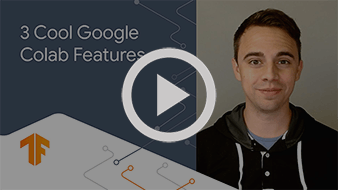
  </a>
</center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [ ]:
df.shape


(800, 22)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df['ethnicity'].value_counts()


ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [ ]:
df['relation'].value_counts()


relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [ ]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


In [ ]:
# import required modules
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=10000,
                            weights=[0.99],
                            flip_y=0)
print('X:\n', X)
print('y:\n', y)


X:
 [[ 1.02868212  0.37528192 -0.43904342 ... -1.79514372  0.31652822
   0.99843735]
 [ 1.45563673  1.14951282  1.07554958 ... -0.13901709  0.53160156
   2.57312117]
 [-0.10524192 -0.3736066  -0.00524346 ...  1.1913272  -1.89106088
  -0.87496862]
 ...
 [-0.21201455  0.46601997 -1.43748812 ... -0.45038826 -0.99878974
  -0.32426665]
 [ 1.38074313  1.07564169  1.33351774 ... -0.16000221  0.0636011
   0.3525491 ]
 [ 1.2079993  -0.61208398 -0.51218409 ...  0.11333966  0.29243407
  -1.5218657 ]]
y:
 [0 0 0 ... 0 0 0]


In [ ]:
# import required modules
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define dataset
x, y = make_classification(n_samples=10000,
						weights=[0.99],
						flip_y=0)

oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)

# print the features and the labels
print('x_over:\n', x_over)
print('y_over:\n', y_over)


x_over:
 [[ 0.2083952   1.316544    0.00393547 ...  0.34538044  0.04707502
   0.37627417]
 [ 0.83570457  1.20700644 -0.31571403 ...  0.53093662  0.12487656
   0.84318986]
 [-2.08495149 -0.34292792  0.60771218 ... -0.02785928  1.13833802
   0.13236291]
 ...
 [-0.18372421  1.74601986 -0.12522958 ... -0.20414153  0.28355468
  -0.86594517]
 [ 0.8808764   0.86991804 -1.38550295 ... -0.86140041 -0.71520854
  -0.27836432]
 [-0.42342228 -3.09822917  0.67128097 ... -1.18698535 -0.15650717
   0.41211694]]
y_over:
 [0 0 0 ... 1 1 1]


In [ ]:
# import required modules
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# define dataset
x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

# print the features and the labels
print('x_smote:\n', x_smote)
print('y_smote:\n', y_smote)


x_smote:
 [[ 0.21079283  0.08930925 -0.625386   ... -0.62560115  0.38612518
   0.24442923]
 [-1.71073452  1.47260219 -0.06689628 ... -1.2347658   0.98890054
   0.5706163 ]
 [-0.44086458  0.33545988  0.03875119 ...  1.05630997 -0.70295205
  -0.43253744]
 ...
 [-0.10397823  1.16461095  1.37779097 ...  2.18795867 -1.13362123
  -0.77056526]
 [ 0.34038854 -1.07258318  0.3950061  ...  2.13262363  1.64612862
   0.31856575]
 [ 1.73295406  0.66746383 -0.562523   ...  2.82585989 -0.09024724
  -0.4610473 ]]
y_smote:
 [0 0 0 ... 1 1 1]


In [ ]:
# import required modules
from sklearn.datasets import make_classification
from imblearn.under_sampling import EditedNearestNeighbours

# define dataset
x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
en = EditedNearestNeighbours()
x_en, y_en = en.fit_resample(x, y)

# print the features and the labels
print('x_en:\n', x_en)
print('y_en:\n', y_en)


x_en:
 [[ 0.06727863  0.60316769  0.61768865 ... -1.17237976  0.86046452
   0.51992861]
 [-1.94353664 -0.95453931  0.77010073 ...  0.00811763 -0.50876348
   1.34118775]
 [-1.92591789  0.33809441 -1.70341242 ...  2.06055773  0.44787955
   0.83558268]
 ...
 [-0.28278131 -0.372695   -0.66199977 ... -1.11915143  0.02345633
  -0.85444342]
 [-0.66816591 -0.51945332  0.59631529 ...  0.30364081  2.01823181
   1.36517149]
 [ 1.73863092  0.25900384 -0.22601606 ...  0.83521092 -0.99764431
   1.17702665]]
y_en:
 [0 0 0 ... 1 1 1]


In [ ]:
# import required modules
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# define dataset
x, y = make_classification(n_samples=10000,
						weights=[0.99],
						flip_y=0)
undersample = RandomUnderSampler()
x_under, y_under = undersample.fit_resample(x, y)

# print the features and the labels
print('x_under:\n', x_under)
print('y_under:\n', y_under)


x_under:
 [[-1.04938761  1.00121139 -0.24474793 ...  1.5128865  -0.82947799
  -0.81981403]
 [-1.19185943 -0.41434805 -0.94231991 ...  0.4574939   2.2387693
  -0.78578343]
 [ 0.96694891  0.4077267  -1.08177142 ...  0.76803723  0.69549807
  -0.49160893]
 ...
 [-0.08502272  0.36562654  2.03178777 ... -2.12762497 -0.99232217
   2.48327816]
 [ 0.91443684  0.8342676  -0.11453634 ...  0.5007343   0.26126199
   0.10585118]
 [-0.12355013  1.73030081 -1.05865062 ...  1.00205253  0.46257537
   0.25742365]]
y_under:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


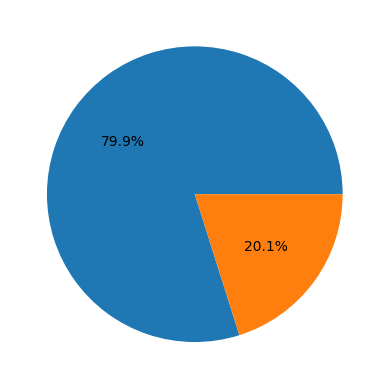

In [ ]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [ ]:
ints = []
objects = []
floats = []

for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)



In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')




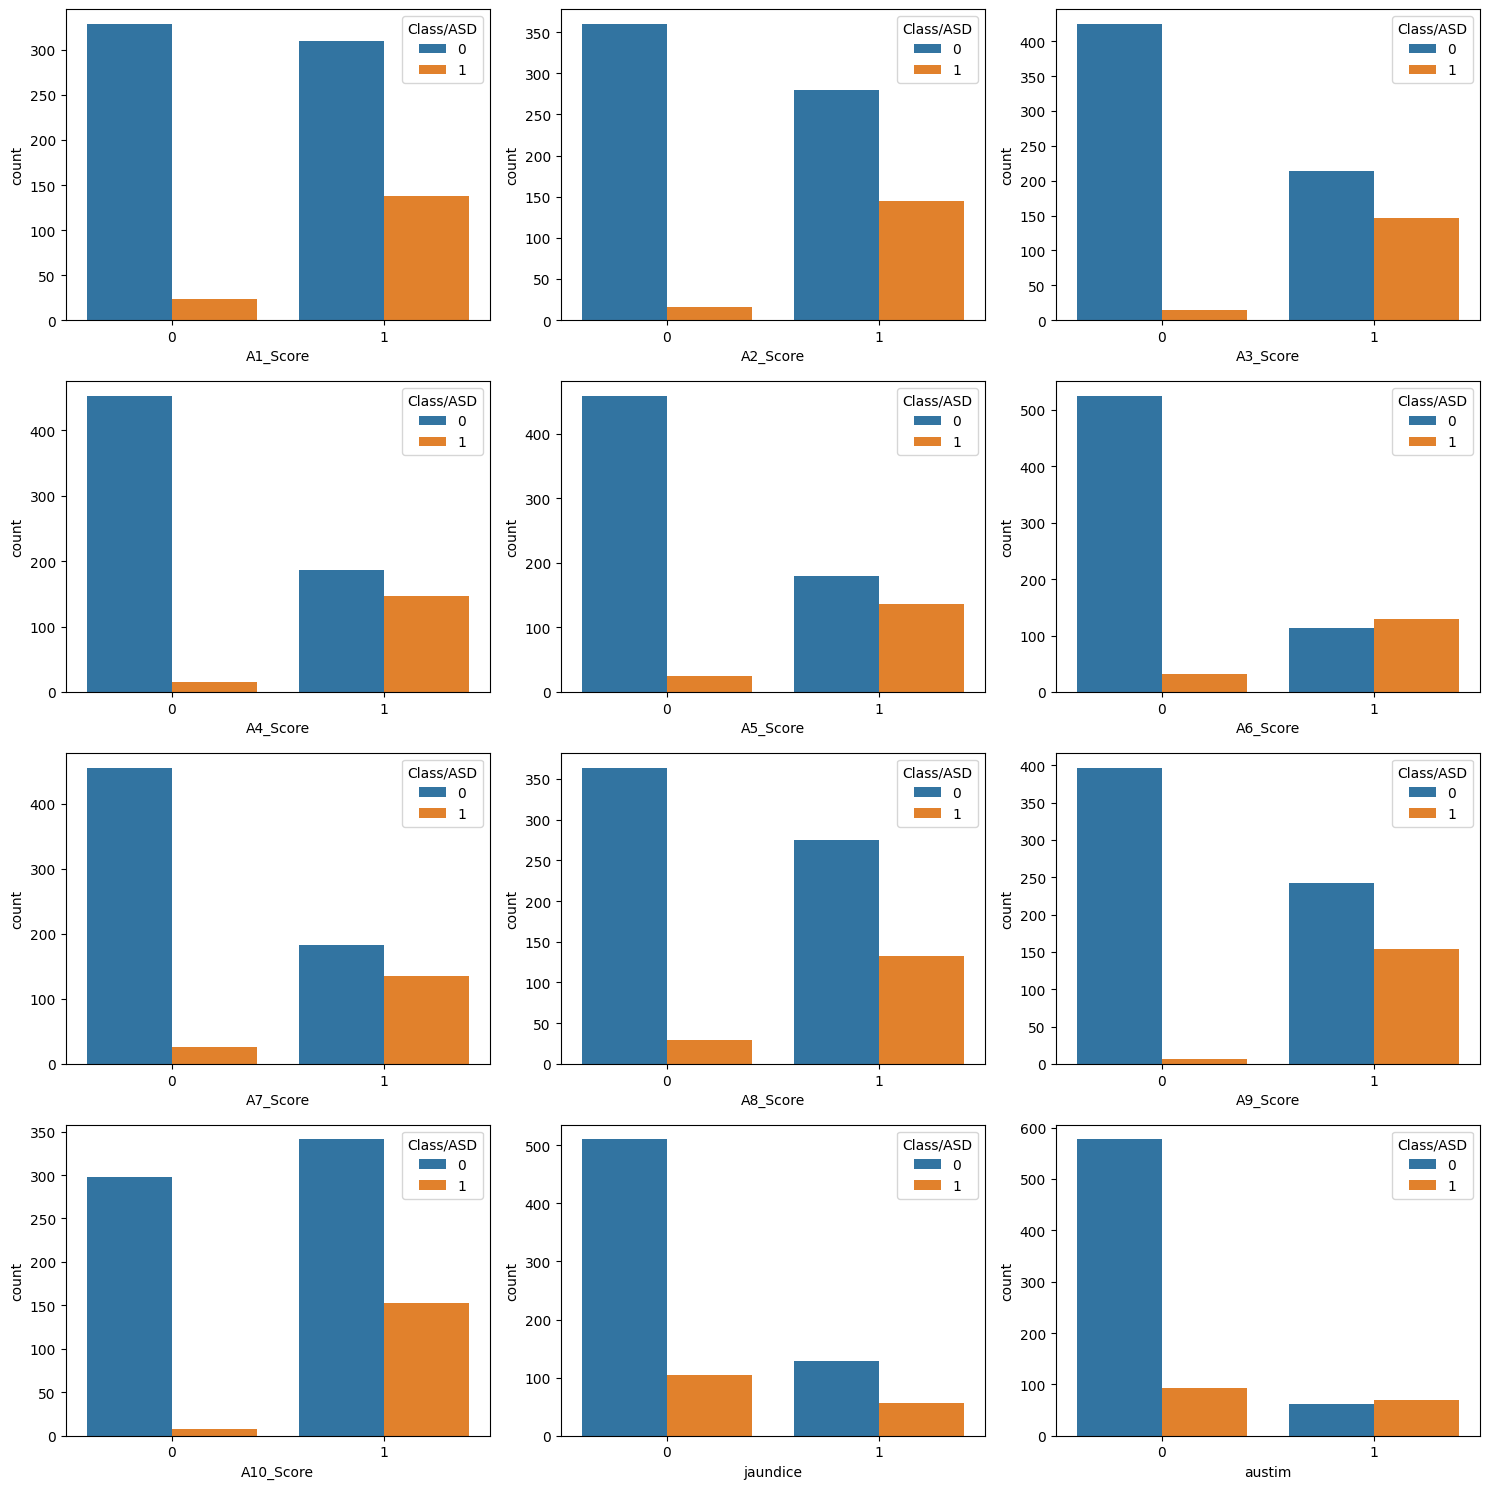

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15, 15))

# Limiting the loop to the first 12 integer columns
for i, col in enumerate(ints[:12]):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=col, data=df, hue='Class/ASD')
    plt.tight_layout()

plt.show()




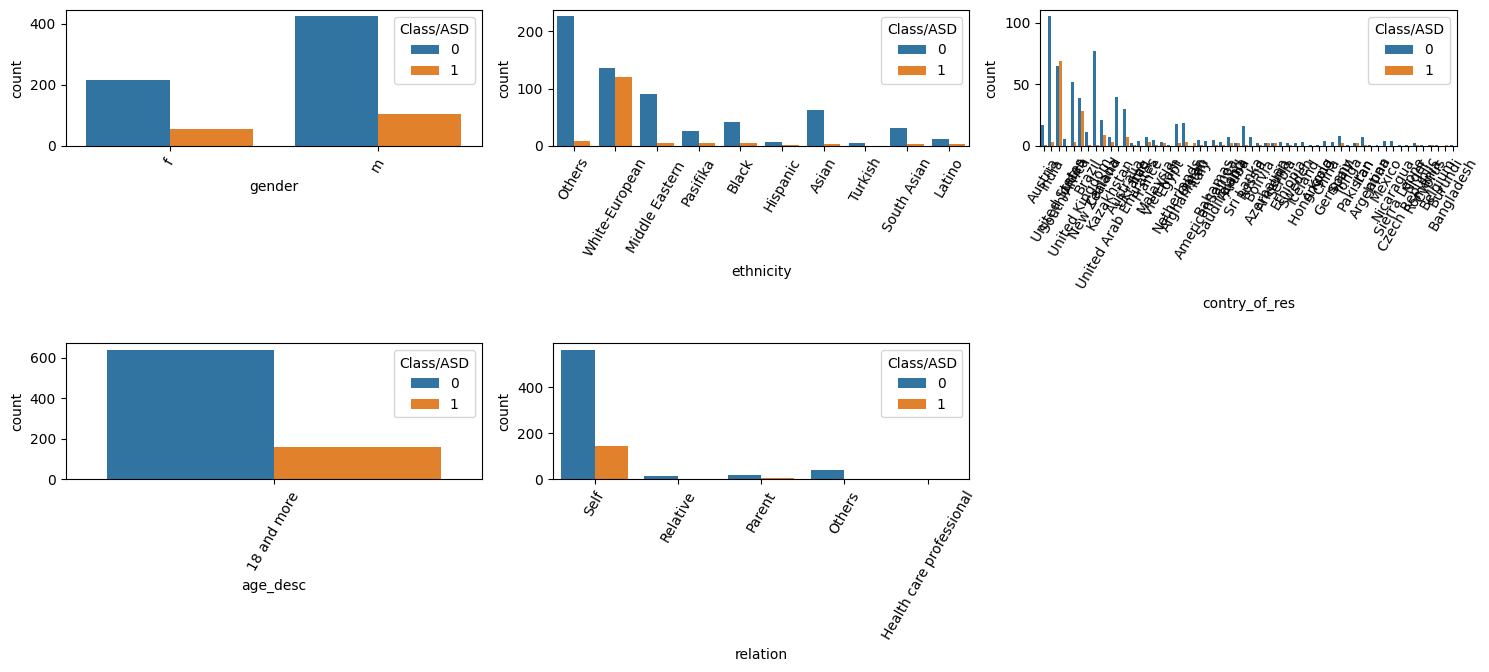

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))

# Limiting the loop to the first 15 object columns for demonstration
for i, col in enumerate(objects[:15]):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=col, data=df, hue='Class/ASD')
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()



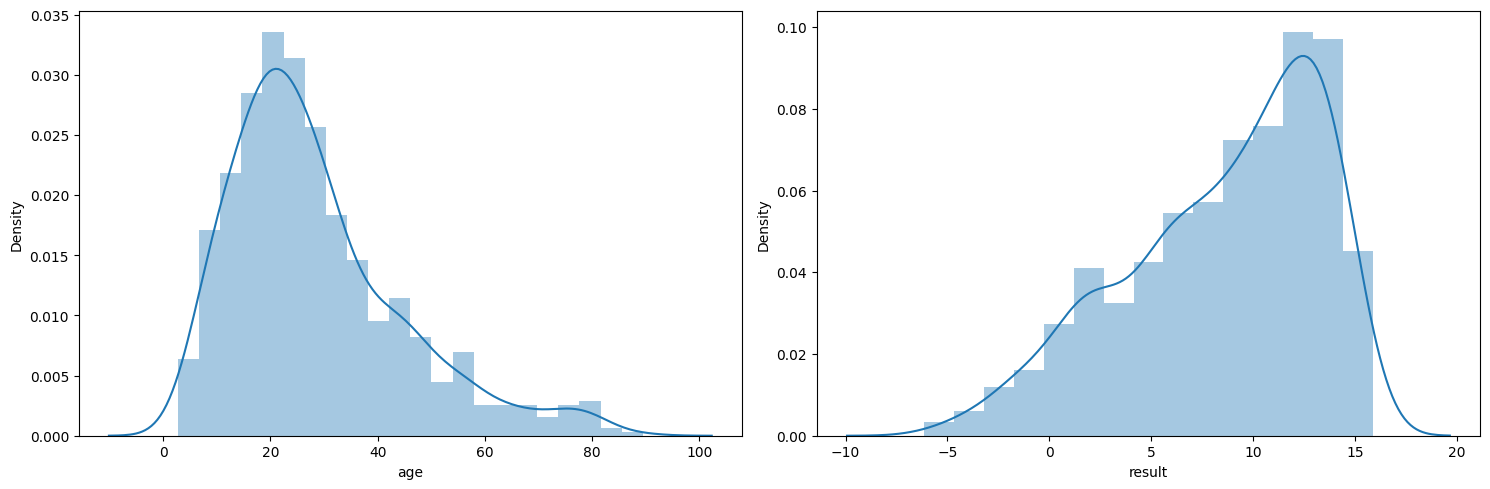

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


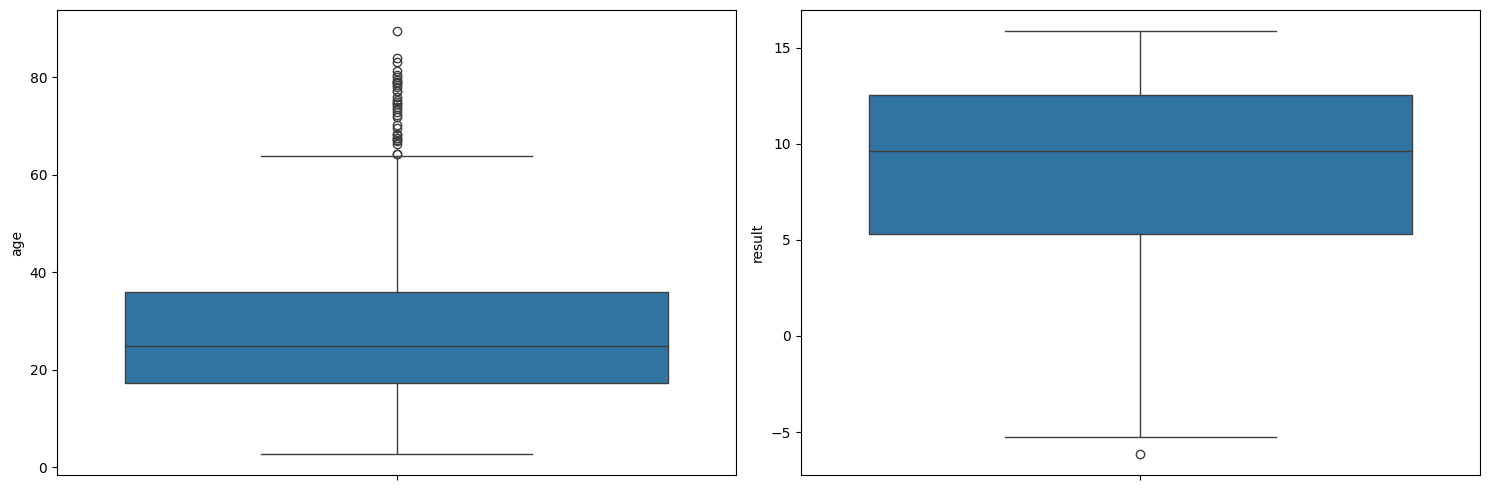

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [ ]:
df = df[df['result']>-5]
df.shape


(798, 22)

In [ ]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


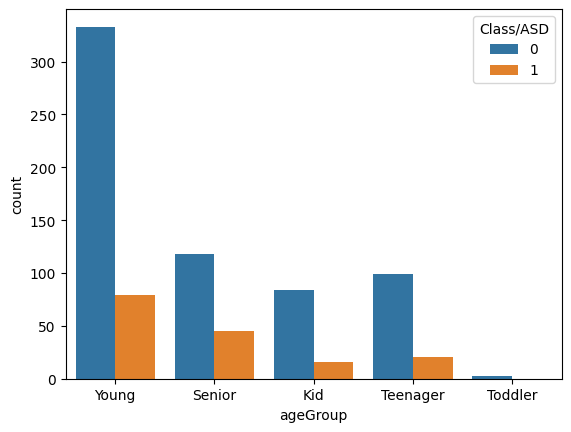

In [ ]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()


In [ ]:
def add_feature(data):
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:
    data['sum_score'] += data[col]
    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']
  return data
df = add_feature(df)


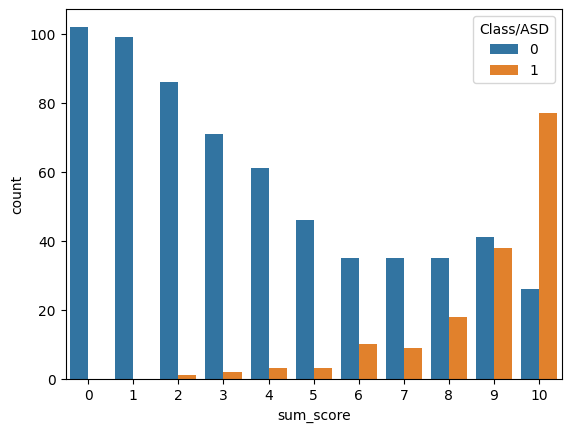

In [ ]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()


In [ ]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))


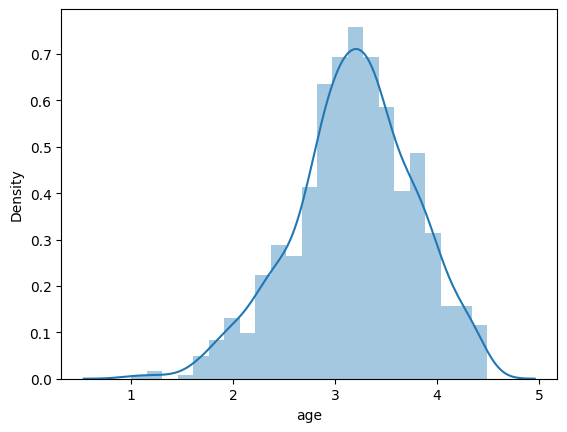

In [ ]:
sb.distplot(df['age'])
plt.show()


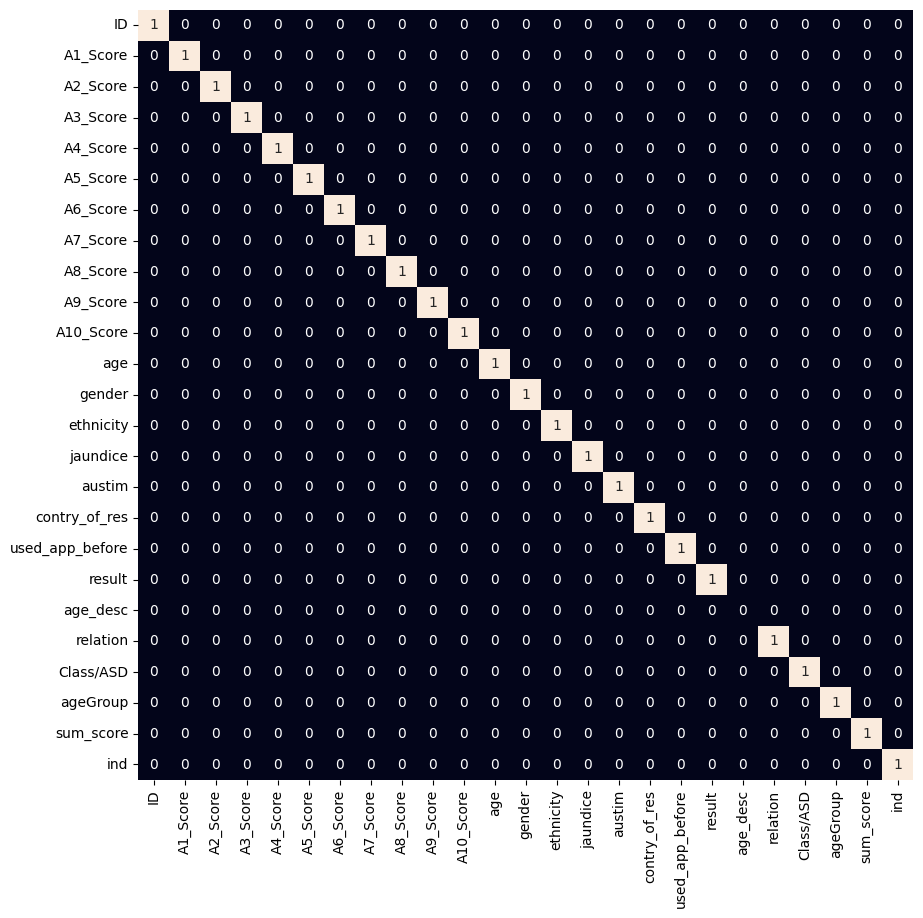

In [ ]:
def encode_labels(data):
  for col in data.columns:
    if data[col].dtype == 'object':
      le = LabelEncoder()
      data[col] = le.fit_transform(data[col])
  return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [ ]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((1026, 20), (1026,))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

print(f'{model} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
print()


SVC() : 
Training Accuracy :  0.9405458089668616
Validation Accuracy :  0.8042114695340501



<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

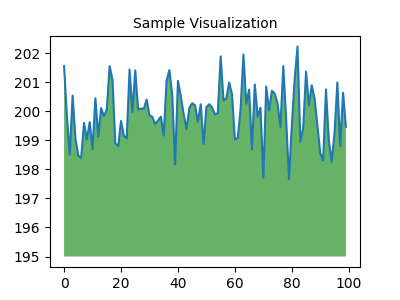

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
